In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Plot Profit / Loss Curves for European Options long and short

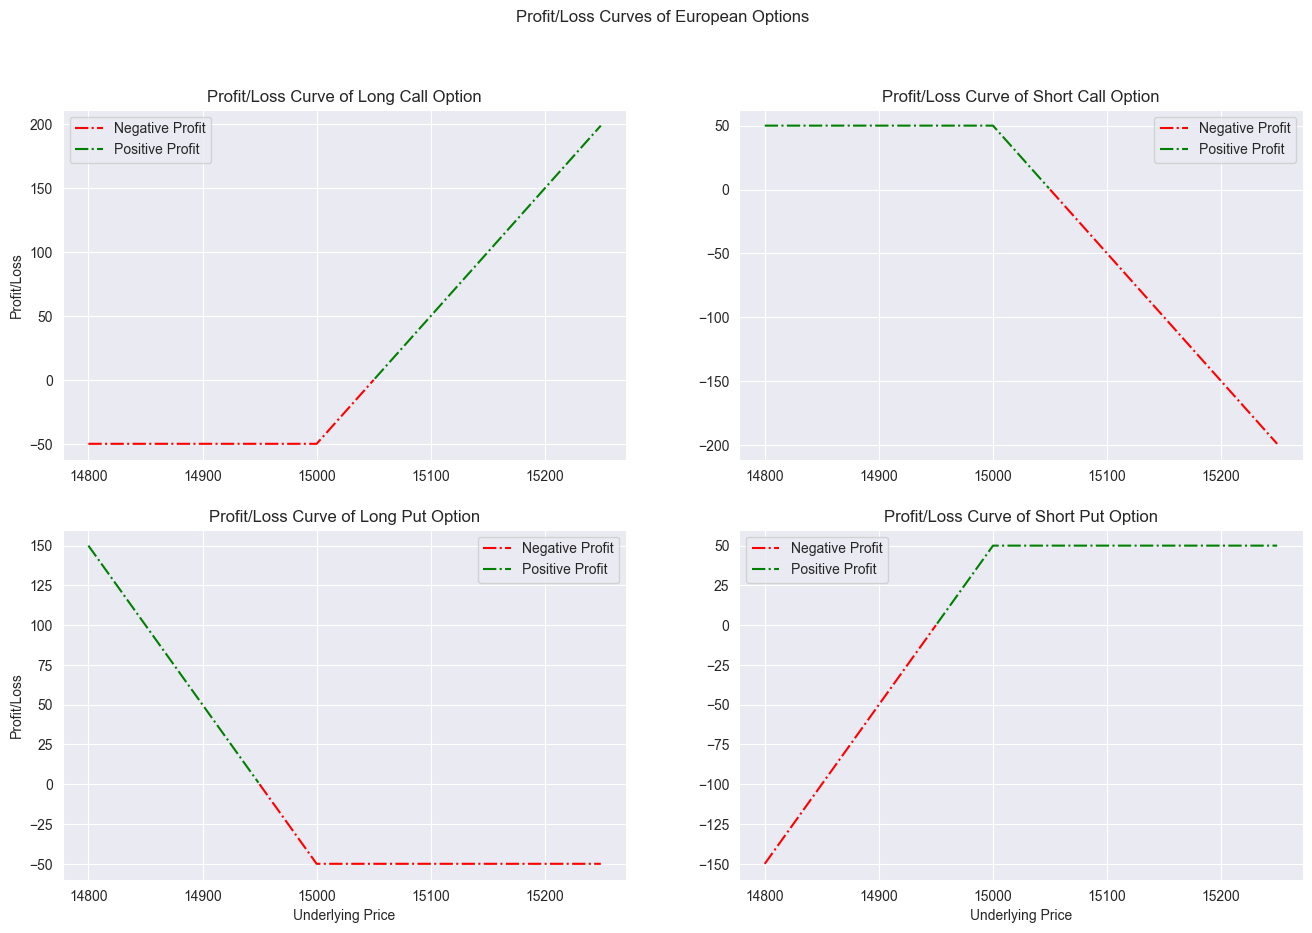

In [12]:
def plot_pl_curve(strike_price, premium, stock_price):
    # calculate profit/loss for each stock price
    pl_call_short_neg = []
    pl_call_short_pos = []
    pl_put_short_neg = []
    pl_put_short_pos = []
    pl_call_long_neg = []
    pl_call_long_pos = []
    pl_put_long_neg = []
    pl_put_long_pos = []
    stock_price_call_short_neg = []
    stock_price_call_short_pos = []
    stock_price_put_short_neg = []
    stock_price_put_short_pos = []
    stock_price_call_long_neg = []
    stock_price_call_long_pos = []
    stock_price_put_long_neg = []
    stock_price_put_long_pos = []
    
    for price in stock_price:
        if premium - max(price - strike_price, 0) <= 0:
            stock_price_call_short_neg.append(price)
            pl_call_short_neg.append(premium - max(price - strike_price, 0))
        else:
            stock_price_call_short_pos.append(price)
            pl_call_short_pos.append(premium - max(price - strike_price, 0))
        if premium - max(strike_price - price, 0) <= 0:
            stock_price_put_short_neg.append(price)
            pl_put_short_neg.append(premium - max(strike_price - price, 0))
        else:
            stock_price_put_short_pos.append(price)
            pl_put_short_pos.append(premium - max(strike_price - price, 0))
        if max(price - strike_price, 0) - premium <= 0:
            stock_price_call_long_neg.append(price)
            pl_call_long_neg.append(max(price - strike_price, 0) - premium)
        else:
            stock_price_call_long_pos.append(price)
            pl_call_long_pos.append(max(price - strike_price, 0) - premium)
        if max(strike_price - price, 0) - premium <= 0:
            stock_price_put_long_neg.append(price)
            pl_put_long_neg.append(max(strike_price - price, 0) - premium)
        else:
            stock_price_put_long_pos.append(price)
            pl_put_long_pos.append(max(strike_price - price, 0) - premium)
    
    # plot graph
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle("Profit/Loss Curves of European Options")
    axs[0,0].plot(stock_price_call_long_neg, pl_call_long_neg, linestyle='-.', color='r')
    axs[0,0].plot(stock_price_call_long_pos, pl_call_long_pos, linestyle='-.', color='g')
    #axs[1,1].set_xlabel("Underlying Price")
    axs[0,0].set_ylabel("Profit/Loss")
    axs[0,0].set_title("Profit/Loss Curve of Long Call Option")

    axs[1,0].plot(stock_price_put_long_neg, pl_put_long_neg, linestyle='-.', color='r')
    axs[1,0].plot(stock_price_put_long_pos, pl_put_long_pos, linestyle='-.', color='g')
    axs[1,0].set_xlabel("Underlying Price")
    axs[1,0].set_ylabel("Profit/Loss")
    axs[1,0].set_title("Profit/Loss Curve of Long Put Option")

    axs[0,1].plot(stock_price_call_short_neg, pl_call_short_neg, linestyle='-.', color='r')
    axs[0,1].plot(stock_price_call_short_pos, pl_call_short_pos, linestyle='-.', color='g')
    #axs[0].set_xlabel("Underlying Price")
    #axs[0,1].set_ylabel("Profit/Loss")
    axs[0,1].set_title("Profit/Loss Curve of Short Call Option")

    axs[1,1].plot(stock_price_put_short_neg, pl_put_short_neg, linestyle='-.', color='r')
    axs[1,1].plot(stock_price_put_short_pos, pl_put_short_pos, linestyle='-.', color='g')
    axs[1,1].set_xlabel("Underlying Price")
    #axs[1,1].set_ylabel("Profit/Loss")
    axs[1,1].set_title("Profit/Loss Curve of Short Put Option")
    axs[0,0].legend(["Negative Profit", "Positive Profit"])
    axs[0,1].legend(["Negative Profit", "Positive Profit"])
    axs[1,0].legend(["Negative Profit", "Positive Profit"])
    axs[1,1].legend(["Negative Profit", "Positive Profit"])
    plt.savefig("./figures/pl_options.pdf", bbox_inches='tight')

plot_pl_curve(15000, 50, np.arange(14800, 15250, 1))


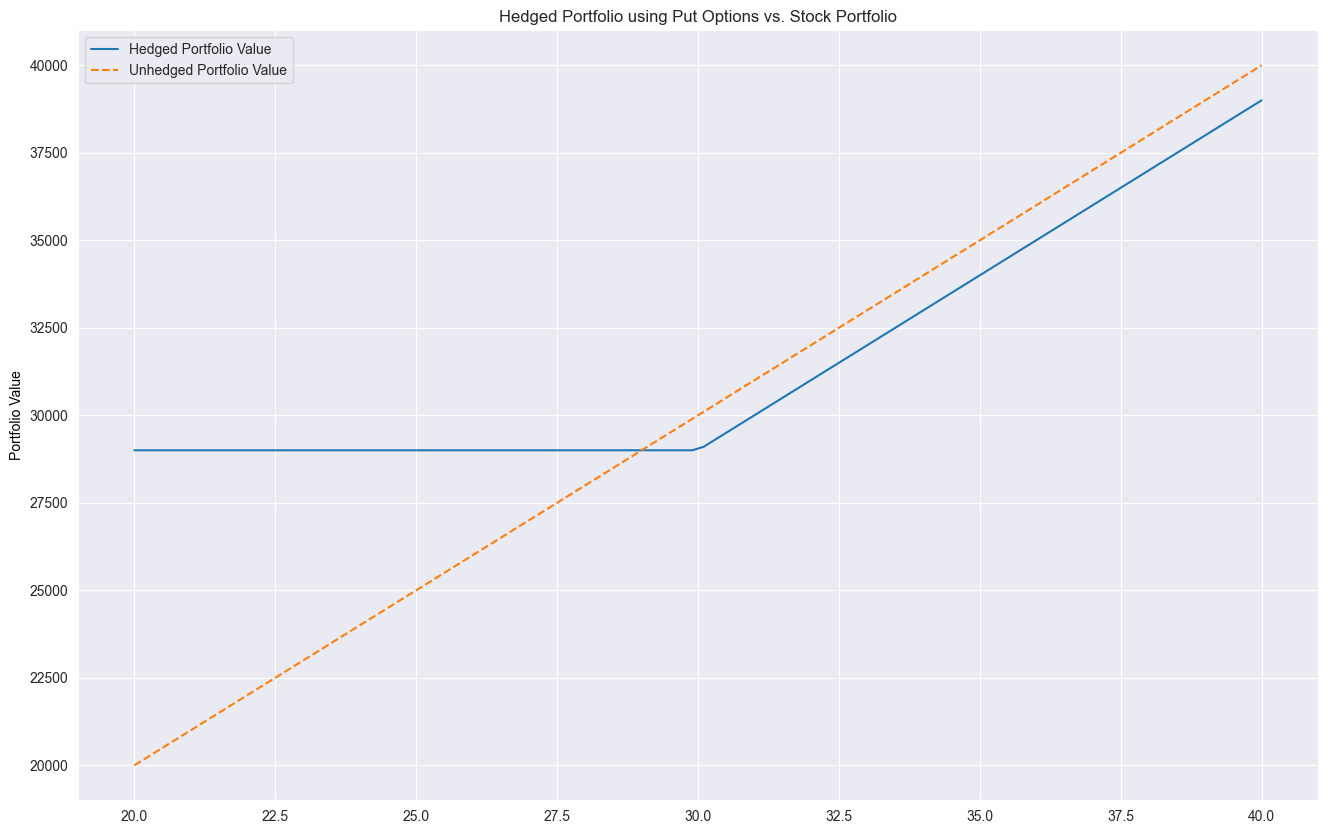

In [9]:
shares = 1000
put_cost = 1000  # cost of put options in euros
strike_price = 30  # assuming strike price for simplicity
stock_prices = np.linspace(20, 40, 100)  # stock prices from 20 to 40
unhedged_portfolio_values = shares * stock_prices

# Portfolio value calculation
portfolio_values = []

for price in stock_prices:
    # Value of shares
    shares_value = shares * price
    # Value of put options
    if price < strike_price:
        put_value = shares * (strike_price - price)
    else:
        put_value = 0
    # Total portfolio value
    total_value = shares_value + put_value - put_cost
    portfolio_values.append(total_value)
# Use seaborn style for the plot
sns.set_style("darkgrid")

# Plotting the graph using seaborn
plt.figure(figsize=(16, 10))
ax1 = plt.gca()
sns.lineplot(x=stock_prices, y=portfolio_values, label="Hedged Portfolio Value", ax=ax1)
sns.lineplot(x=stock_prices, y=unhedged_portfolio_values, label="Unhedged Portfolio Value", linestyle='--', ax=ax1)

ax1.set_title('Hedged Portfolio using Put Options vs. Stock Portfolio')
ax1.set_ylabel('Portfolio Value', color='black')
ax1.legend(loc='upper left')
plt.savefig('../figures/hedged_portfolio.pdf')

### Plot Payoff Diagram for Iron Conodor

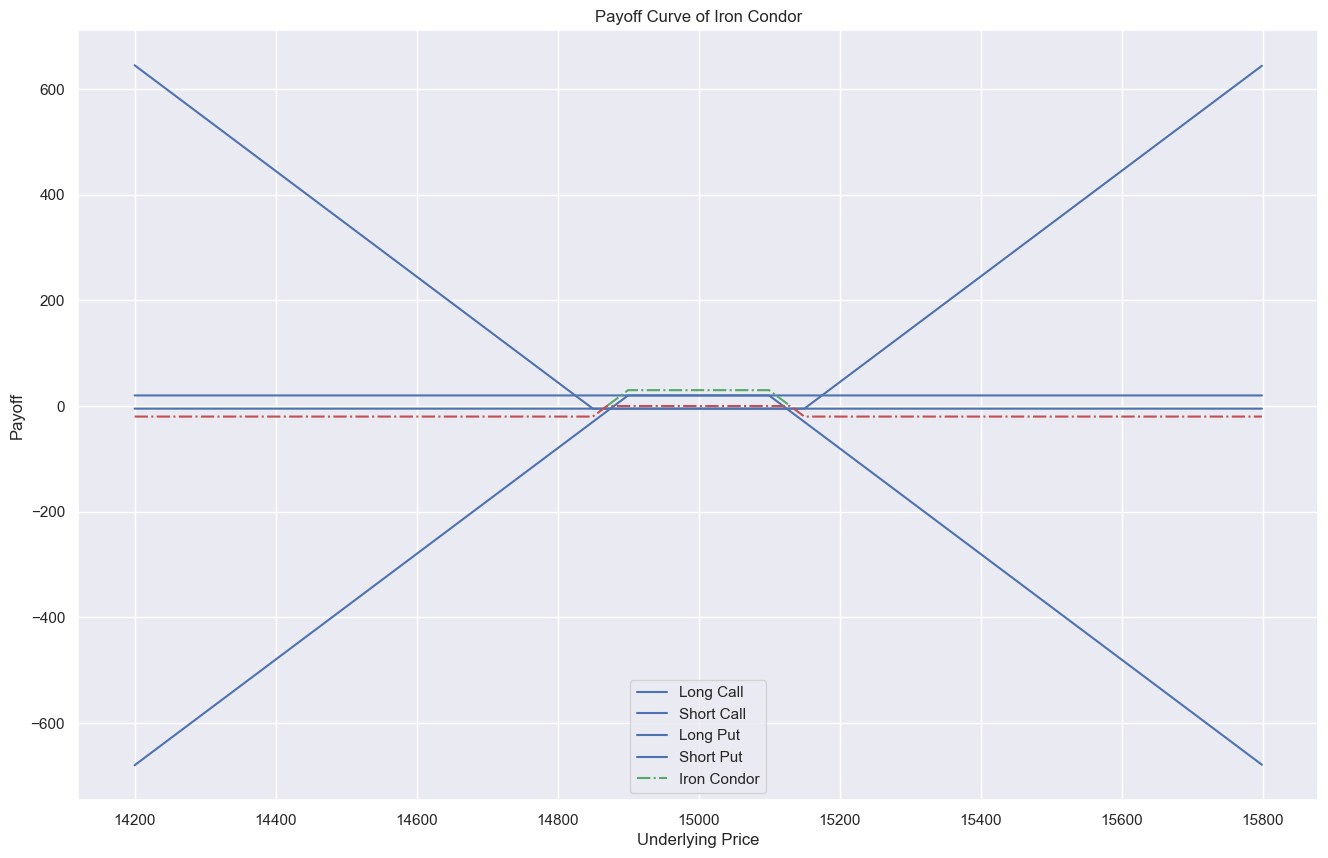

In [95]:
def plot_payoff_iron_condor(strike_prices, premiums, stock_price):
    strike_call_short = strike_prices[0]
    strike_call_long = strike_prices[1]
    strike_put_short = strike_prices[2]
    strike_put_long = strike_prices[3]
    premium_call_short = premiums[0]
    premium_call_long = premiums[1]
    premium_put_short = premiums[2]
    premium_put_long = premiums[3]
    value_iron_condor_pos = []
    value_iron_condor_neg = []
    price_pos = []
    price_neg = []
    values_long_call = []
    values_short_call = []
    values_long_put = []
    values_short_put = []
    for price in stock_price:
        value_long_call = max(price - strike_call_long, 0) - premium_call_long
        value_short_call = premium_call_short - max(price - strike_call_short, 0)
        value_long_put = max(strike_put_long - price, 0) - premium_put_long
        value_short_put = premium_put_short - max(strike_put_short - price, 0)
        values_long_call.append(value_long_call)
        values_short_call.append(value_short_call)
        values_long_put.append(value_long_put)
        values_short_put.append(value_short_put)
        if sum([value_long_call, value_short_call, value_long_put, value_short_put]) <= 0:
            price_neg.append(price)
            value_iron_condor_neg.append(sum([value_long_call, value_short_call, value_long_put, value_short_put]))
        elif sum([value_long_call, value_short_call, value_long_put, value_short_put]) > 0:
            price_pos.append(price)
            value_iron_condor_pos.append(sum([value_long_call, value_short_call, value_long_put, value_short_put]))
        else:
            continue

    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 1, figsize=(16, 10))
    #fig.suptitle("Payoff Curve of Iron Condor")
    axs.plot(stock_price, values_long_call, linestyle='-', color='b')
    axs.plot(stock_price, values_short_call, linestyle='-', color='b')
    axs.plot(stock_price, values_long_put, linestyle='-', color='b')
    axs.plot(stock_price, values_short_put, linestyle='-', color='b')
    axs.plot(price_pos, value_iron_condor_pos, linestyle='-.', color='g')
    axs.plot(price_neg, value_iron_condor_neg, linestyle='-.', color='r')
    axs.set_xlabel("Underlying Price")
    axs.set_ylabel("Payoff")
    axs.legend(["Long Call", "Short Call", "Long Put", "Short Put", "Iron Condor"])
    axs.set_title("Payoff Curve of Iron Condor")
    #plt.show()
    plt.savefig("./figures/pl_iron_condor.pdf", bbox_inches='tight')

plot_payoff_iron_condor([15100, 15150, 14900, 14850], [20, 5, 20, 5], np.arange(14200, 15800, 1))

In [1]:
import opstrat as op

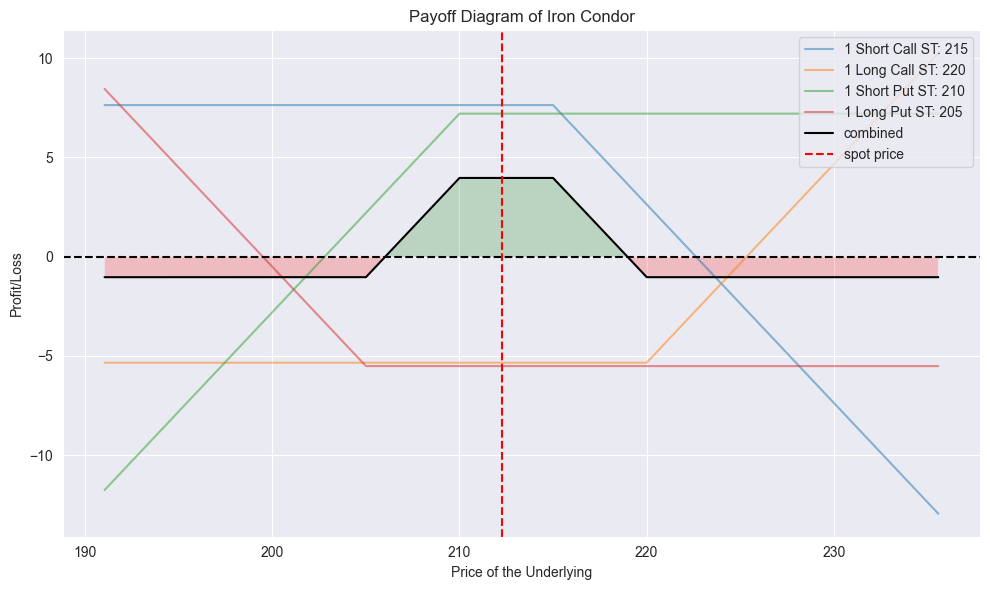

In [2]:
op1={'op_type': 'c', 'strike': 215, 'tr_type': 's', 'op_pr': 7.63}
op2={'op_type': 'c', 'strike': 220, 'tr_type': 'b', 'op_pr': 5.35}
op3={'op_type': 'p', 'strike': 210, 'tr_type': 's', 'op_pr': 7.20}
op4={'op_type': 'p', 'strike': 205, 'tr_type': 'b', 'op_pr': 5.52}

op_list=[op1, op2, op3, op4]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list, save=True, file='../figures/iron_condor.pdf', title='Payoff Diagram of Iron Condor')


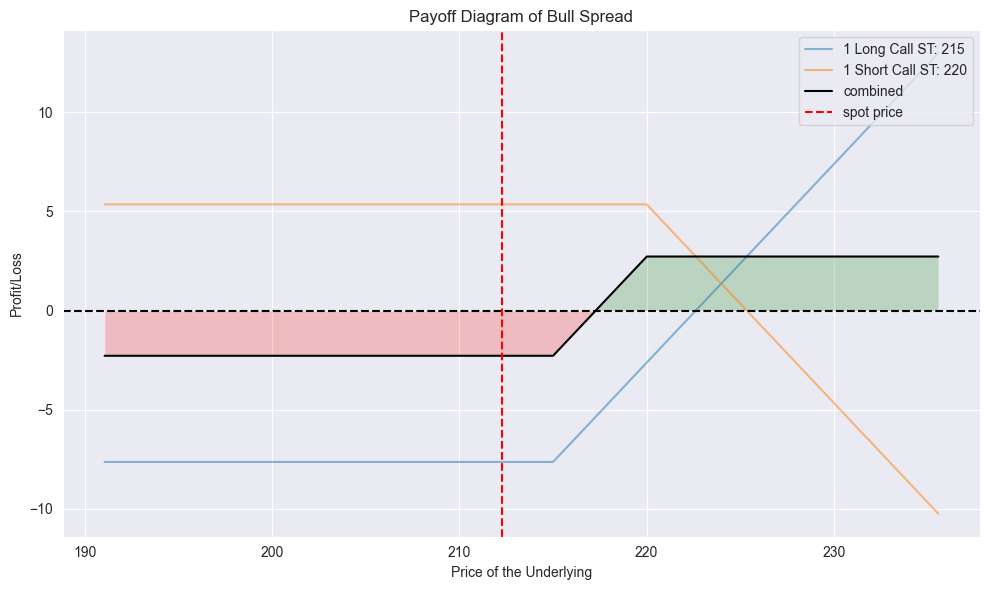

In [3]:
# bull spread using opstrat
op1={'op_type': 'c', 'strike': 215, 'tr_type': 'b', 'op_pr': 7.63}
op2={'op_type': 'c', 'strike': 220, 'tr_type': 's', 'op_pr': 5.35}

op_list=[op1, op2]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list, save=True, file='../figures/bull_spread.pdf', title='Payoff Diagram of Bull Spread')

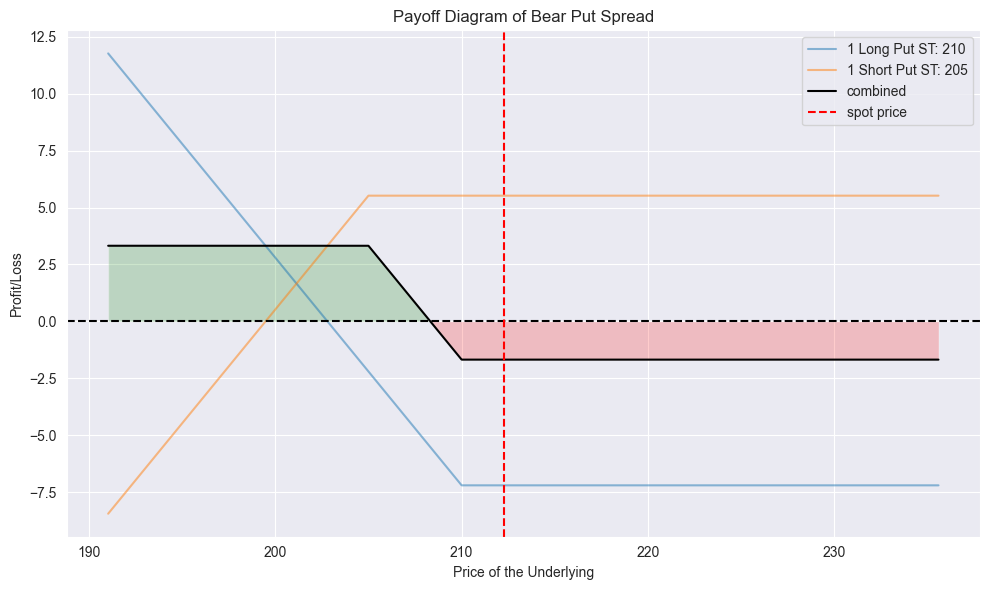

In [4]:
# bear put spread using opstrat
op1={'op_type': 'p', 'strike': 210, 'tr_type': 'b', 'op_pr': 7.20}
op2={'op_type': 'p', 'strike': 205, 'tr_type': 's', 'op_pr': 5.52}

op_list=[op1, op2]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list, save=True, file='../figures/bear_spread.pdf', title='Payoff Diagram of Bear Put Spread')

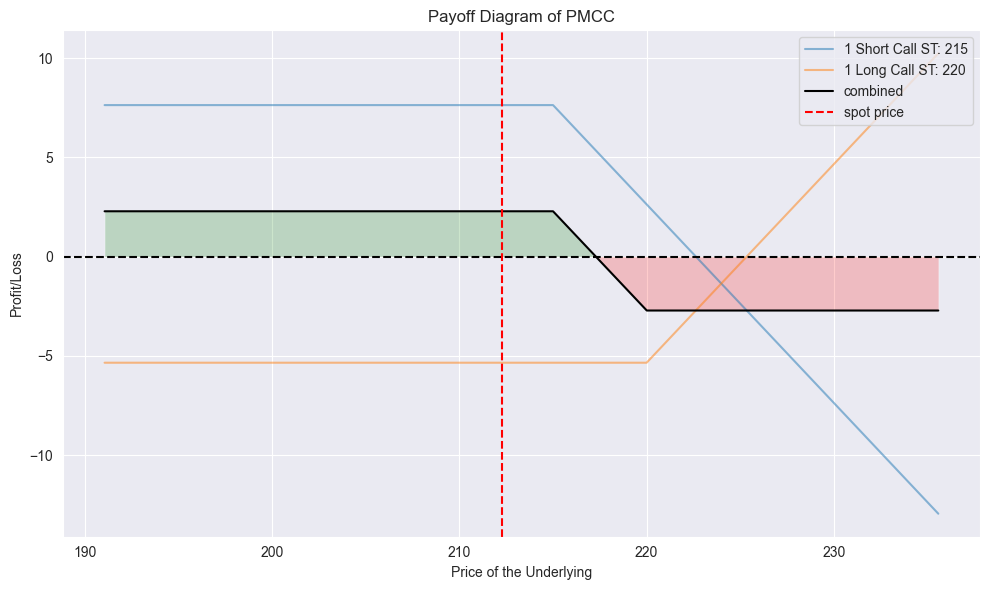

In [5]:
# payoff short call and long call at higher strike price and lower  combined using opstrat
op1={'op_type': 'c', 'strike': 215, 'tr_type': 's', 'op_pr': 7.63}
op2={'op_type': 'c', 'strike': 220, 'tr_type': 'b', 'op_pr': 5.35}

op_list=[op1, op2]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list, save=True, file='../figures/pmcc_payoff.pdf', title='Payoff Diagram of PMCC')

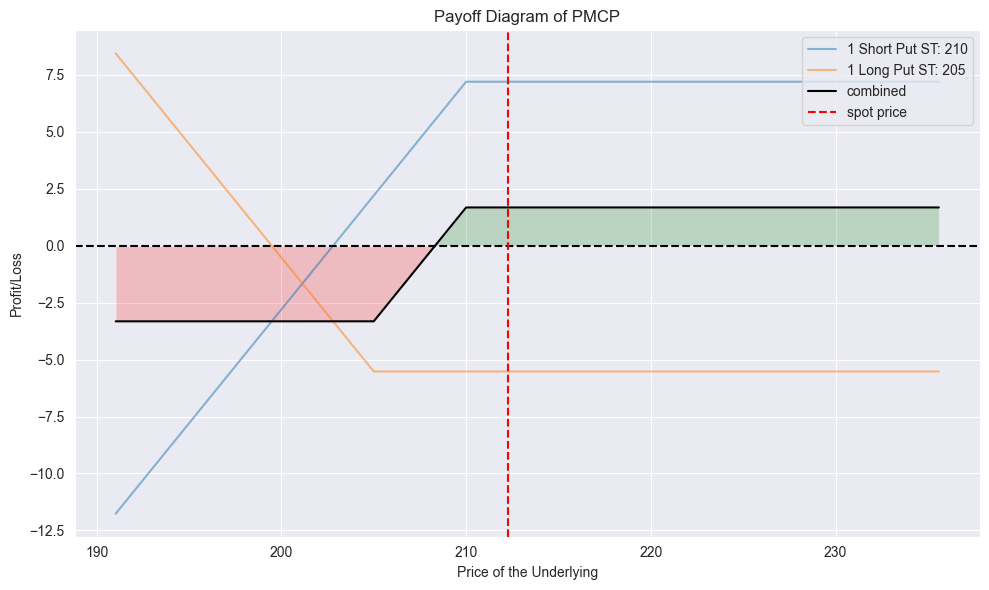

In [6]:
# payoff short put and long put at lower strike price and higher  combined using opstrat
op1={'op_type': 'p', 'strike': 210, 'tr_type': 's', 'op_pr': 7.20}
op2={'op_type': 'p', 'strike': 205, 'tr_type': 'b', 'op_pr': 5.52}

op_list=[op1, op2]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list, save=True, file='../figures/pmcp_payoff.pdf', title='Payoff Diagram of PMCP')

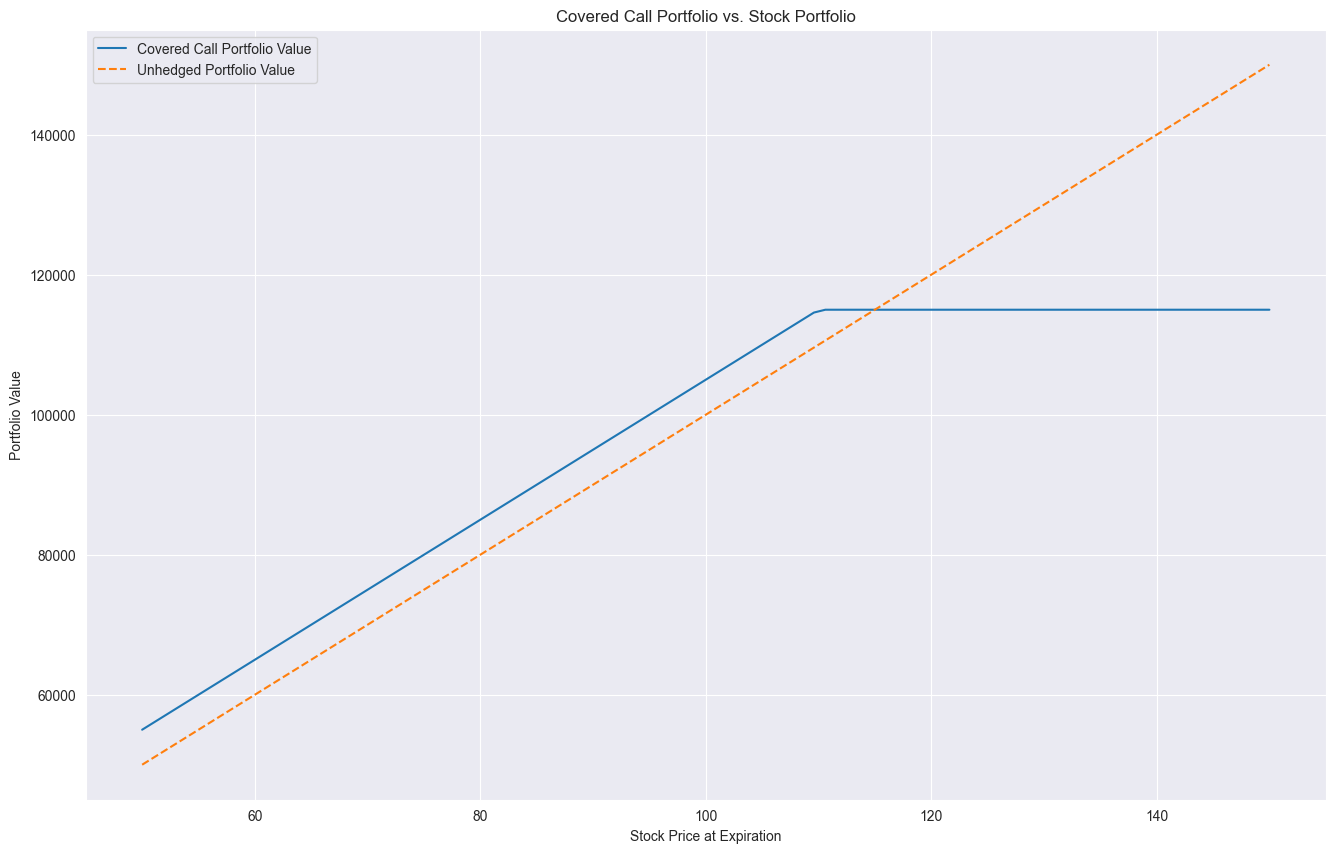

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the covered call
shares = 1000
spot_price = 100  # Current stock price
strike_price = 110  # Strike price of the call option
premium_received = 5  # Premium received from selling the call option

# Range of possible stock prices at expiration
stock_prices = np.linspace(50, 150, 100)
unhedged_portfolio_values = shares * stock_prices

# Portfolio value calculation for covered call strategy
portfolio_values = []

for price in stock_prices:
    # Value of shares
    shares_value = shares * price
    # Value of call options
    if price > strike_price:
        call_value = shares * (price - strike_price)
    else:
        call_value = 0
    # Total portfolio value for covered call
    total_value = shares_value - call_value + shares * premium_received
    portfolio_values.append(total_value)

# Plotting the graph using matplotlib
sns.set_style("darkgrid")
plt.figure(figsize=(16, 10))
ax1 = plt.gca()
plt.plot(stock_prices, portfolio_values, label="Covered Call Portfolio Value")
plt.plot(stock_prices, unhedged_portfolio_values, label="Unhedged Portfolio Value", linestyle='--')

ax1.set_title('Covered Call Portfolio vs. Stock Portfolio')
ax1.set_xlabel('Stock Price at Expiration')
ax1.set_ylabel('Portfolio Value')
ax1.legend(loc='upper left')
plt.grid(True)
plt.savefig('../figures/covered_call_portfolio.pdf')
